In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize  


In [3]:
market_data = pd.read_csv(r"D:\Downloads\Acadamics\MS6621\NSE_FMCG_data.csv")
df = pd.DataFrame(market_data)
df = df.select_dtypes(include=[np.number])

# print(df)
returns = df.pct_change().dropna()
# print(returns)

mean_returns = returns.mean()
cov_matrix = returns.cov()
# max_return = mean_returns.max()
# min_return = mean_returns.min()
# target_returns = np.linspace(min_return-0.01, max_return+0.01,100)

print(mean_returns)
print('------------------------------------------------------------------------------------------------------')
print(cov_matrix)

Balrampur Chini Mills Ltd.                     0.005561
Britannia Industries Ltd.                      0.002794
Colgate Palmolive (India) Ltd.                 0.003864
Dabur India Ltd.                               0.001911
Godrej Consumer Products Ltd.                  0.003432
Hindustan Unilever Ltd.                        0.001555
ITC Ltd.                                       0.002045
Marico Ltd.                                    0.002439
Nestle India Ltd.                              0.003670
Procter & Gamble Hygiene & Health Care Ltd.    0.001904
Radico Khaitan Ltd                             0.007118
Tata Consumer Products Ltd.                    0.006580
United Breweries Ltd.                          0.001975
United Spirits Ltd.                            0.003752
Varun Beverages Ltd.                           0.010511
dtype: float64
------------------------------------------------------------------------------------------------------
                                          

Calculating the portfolio weights by minimizing the variance

In [4]:
def portfolio_total_returns(weights, mean_returns, cov_matrix):
    returns = np.sum(weights*mean_returns)*264
    std_deviation = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(264)
    return returns, std_deviation

def minimize_volatility(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) 
    bounds = tuple((0.01,0.33) for asset in range(num_assets)) #the capping limit for FMCG index is 33%
    result = minimize(lambda weights: portfolio_total_returns(weights, mean_returns, cov_matrix)[1],
                      num_assets*[1./num_assets],
                      method = 'SLSQP',
                      bounds = bounds,
                      tol = 1e-6,
                      constraints = constraints)
    return result

min_var_port = minimize_volatility(mean_returns, cov_matrix)
# print(min_var_port)
# print(min_var_port)
min_var_weights = min_var_port['x']
print("Minimum Variance Portfolio Weights:", min_var_weights)

Minimum Variance Portfolio Weights: [0.01       0.01       0.09407482 0.03721358 0.01       0.0326806
 0.10020079 0.07048529 0.20968978 0.31794252 0.02083209 0.01
 0.01       0.01       0.05688055]


Plotting Efficient Frontier and Indifference Curve (Bonus Part)

c:\Users\91965\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


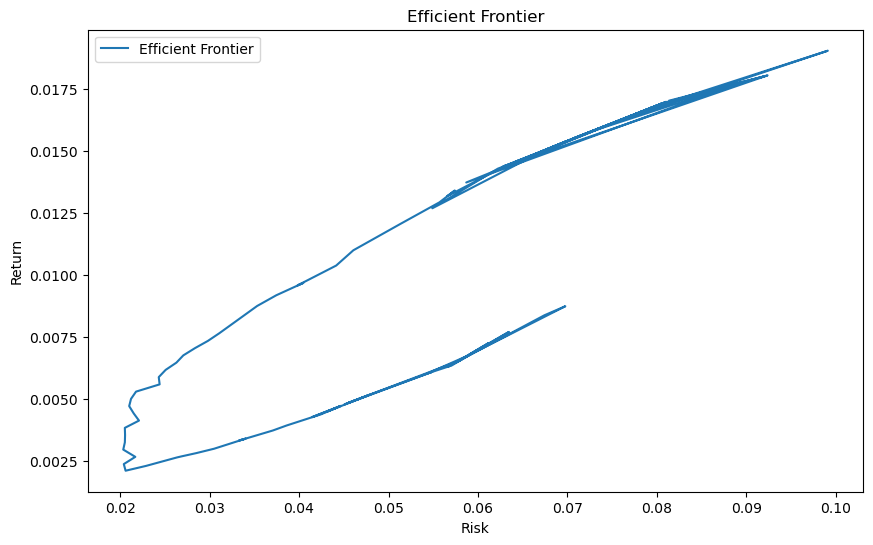

In [23]:
def std_deviation(weights):
    return np.dot(weights.T, np.dot(cov_matrix, weights))
def generate_efficient_frontier(mean_returns, cov_matrix, num_portfolios = 100):
    portfolio_returns = []
    portfolio_risk = []
    max_returns = mean_returns.max()
    min_returns = mean_returns.min()
    target_returns = np.linspace(min_returns-0.01, max_returns+0.01, num_portfolios)
    for target in target_returns:
        constraints = [
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Sum of weights = 1
            {'type': 'eq', 'fun': lambda x: np.dot(x, mean_returns) - target}  # Portfolio expected return = target_return
        ]
        bounds = [(0.01, 0.33) for i in range(len(mean_returns))]
        guess_weights = np.random.rand(len(mean_returns))
        results = minimize(std_deviation, guess_weights, method='SLSQP', bounds=bounds, constraints=constraints)
        weights = results.x
        returns = np.dot(weights, mean_returns)
        risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        portfolio_returns.append(returns)
        portfolio_risk.append(risk)
    return np.array(portfolio_returns), np.array(portfolio_risk)

portfolio_returns, portfolio_risks = generate_efficient_frontier(mean_returns, cov_matrix)
plt.figure(figsize=(10, 6))
plt.plot(portfolio_risks, portfolio_returns, label='Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.legend()
plt.show()
        

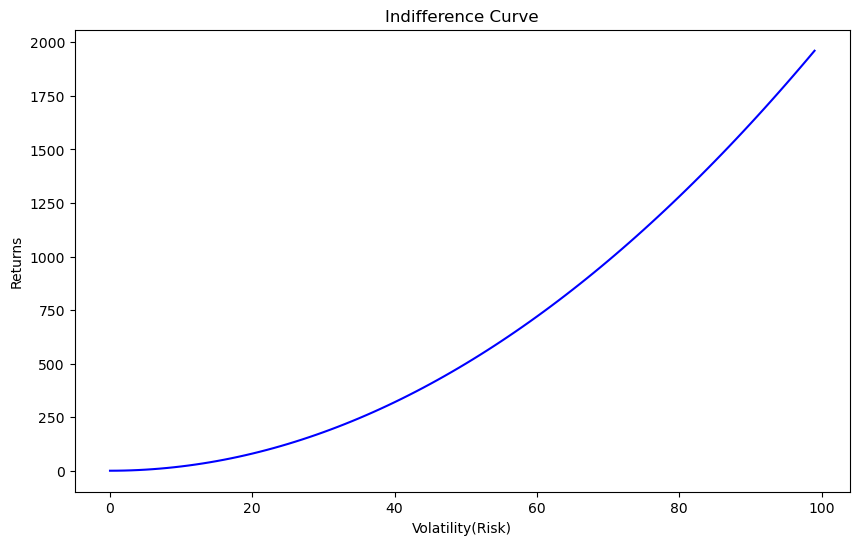

In [28]:
def generate_indifference_curve(mean_returns, cov_matrix, c1,c2):
    num = len(mean_returns)
    weights = np.random.rand(num)
    portfolio_returns = np.dot(weights, mean_returns)
    portfolio_risks =np.dot(weights.T, np.dot(cov_matrix, weights))
    value = c1*portfolio_returns + c2*portfolio_risks**2

    return value, portfolio_returns, portfolio_risks
c1 = 20
c2 = 0.2
indifference_value, indifference_returns, indifference_risks = generate_indifference_curve(mean_returns, cov_matrix, c1, c2)

#plotting the indifference curve
X = np.arange(0, max(indifference_risks, 100))
Y = c1* indifference_returns + c2*X**2
plt.figure(figsize=(10,6))
plt.title('Indifference Curve')
plt.xlabel('Volatility(Risk)')
plt.ylabel('Returns')
plt.plot(X,Y, 'b-')
plt.show()
